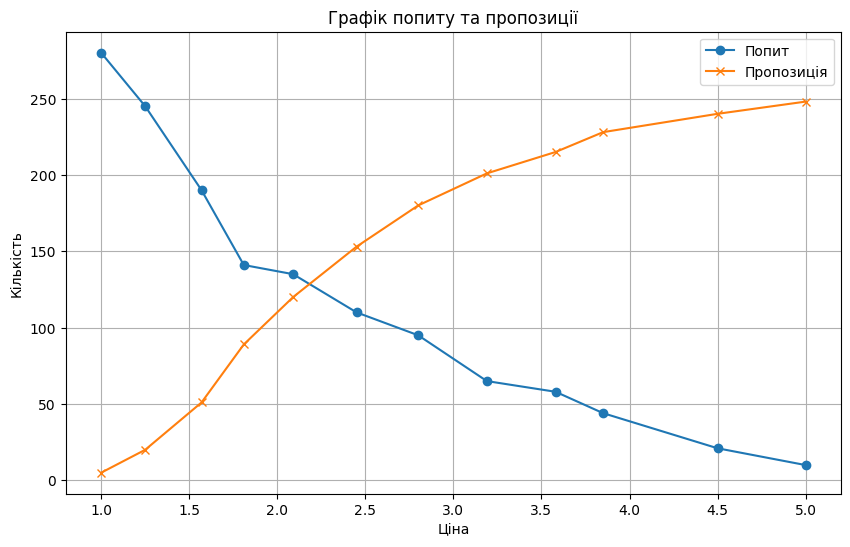

In [2]:
import matplotlib.pyplot as plt

price = [1, 1.25, 1.57, 1.81, 2.09, 2.45, 2.8, 3.19, 3.58, 3.85, 4.5, 5]
demand = [280, 245, 190, 141, 135, 110, 95, 65, 58, 44, 21, 10]
supply = [5, 20, 51, 89, 120, 153, 180, 201, 215, 228, 240, 248]

plt.figure(figsize=(10, 6))

plt.plot(price, demand, label='Попит', marker='o', linestyle='-')
plt.plot(price, supply, label='Пропозиція', marker='x', linestyle='-')

plt.title('Графік попиту та пропозиції')
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)

plt.show()

Параметри попиту (a, b): -63.14450251715705 290.28763235772715
Параметри пропозиції (c, d): 64.57467718978724 -32.23133907560676
Ціна на ринковій рівновазі: 2.525219565090881
Кількість на ринковій рівновазі: 130.83389917347176


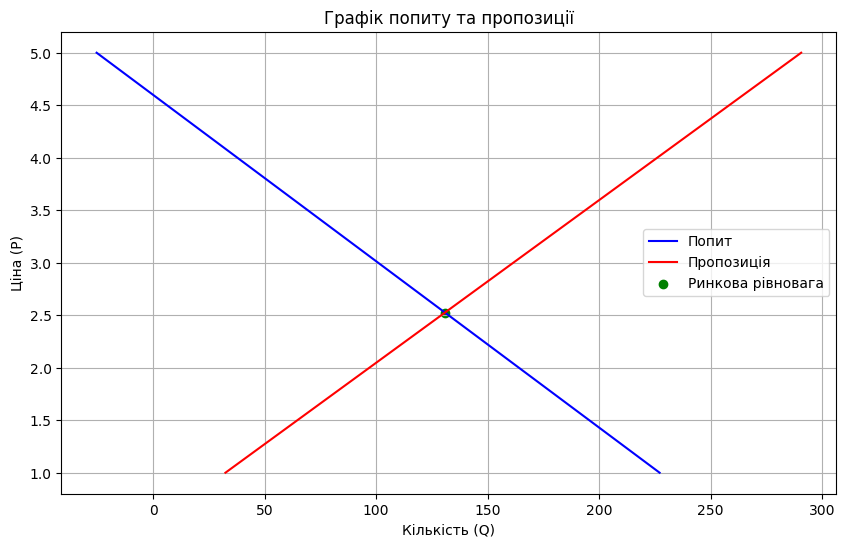

In [5]:
from scipy.optimize import curve_fit

def demand_func(price, a, b):
    return a * price + b

def supply_func(price, c, d):
    return c * price + d

params_demand, _ = curve_fit(demand_func, price, demand)
a, b = params_demand

params_supply, _ = curve_fit(supply_func, price, supply)
c, d = params_supply

from scipy.optimize import fsolve

def market_equilibrium(price):
    return demand_func(price, *params_demand) - supply_func(price, *params_supply)

price_eq = fsolve(market_equilibrium, x0=2)[0]
quantity_eq = demand_func(price_eq, *params_demand)

print("Параметри попиту (a, b):", a, b)
print("Параметри пропозиції (c, d):", c, d)
print("Ціна на ринковій рівновазі:", price_eq)
print("Кількість на ринковій рівновазі:", quantity_eq)

import numpy as np

prices = np.linspace(min(price), max(price), 100)
demand_curve = demand_func(prices, *params_demand)
supply_curve = supply_func(prices, *params_supply)

plt.figure(figsize=(10, 6))

plt.plot(demand_curve, prices, label='Попит', linestyle='-', color='blue')
plt.plot(supply_curve, prices, label='Пропозиція', linestyle='-', color='red')
plt.scatter(quantity_eq, price_eq, color='green', label='Ринкова рівновага')

plt.title('Графік попиту та пропозиції')
plt.xlabel('Кількість (Q)')
plt.ylabel('Ціна (P)')
plt.legend()
plt.grid(True)

plt.show()

In [6]:
def demand_elasticity(price, demand):
    elasticities = []
    for i in range(1, len(price)):
        delta_price = price[i] - price[i-1]
        delta_demand = demand[i] - demand[i-1]
        elasticity = (delta_demand / demand[i]) / (delta_price / price[i])
        elasticities.append(elasticity)
    return sum(elasticities) / len(elasticities)

def supply_elasticity(price, supply):
    elasticities = []
    for i in range(1, len(price)):
        delta_price = price[i] - price[i-1]
        delta_supply = supply[i] - supply[i-1]
        elasticity = (delta_supply / supply[i]) / (delta_price / price[i])
        elasticities.append(elasticity)
    return sum(elasticities) / len(elasticities)

demand_elasticity_value = demand_elasticity(price, demand)
supply_elasticity_value = supply_elasticity(price, supply)

print("Дугова еластичність попиту:", demand_elasticity_value)
print("Дугова еластичність пропозиції:", supply_elasticity_value)

Дугова еластичність попиту: -3.263588331873183
Дугова еластичність пропозиції: 1.589316031495771
